<h1> Data Science: project </h1>
The goal of the project is to develop a software that enables one to process data stored in different formats and to upload them into two distinct databases to query these databases simultaneously according to predefined operations. This document describes the data to process (their main characteristics and possible issues) and how the software has been organised (name of the files, where have been defined the various Python classes, etc.).
<h3>Data</h3>
The exemplar data for testing the project are:

-for creating the relational database, there are two files, a CSV file containing data about publications and a JSON file containing additional information including the authors of each publication, the identifiers of the venue of each publication, and the identifier and name of each publisher publishing the venues;

-for creating the RDF triplestore, there are two files, a CSV file containing data about publications and a JSON file containing additional information including the authors of each publication, the identifiers of the venue of each publication, and the identifier and name of each publisher publishing the venues.


<h1> Data model </h1>
This is the basic data model provided

![Catturadata.PNG](attachment:d5050632-9655-497c-91d4-05f10614c058.PNG)

<h1>UML of data model classes</h1>


All the methods of each class return the appropriate values that have been specified in the object of that class when it has been created. 

![image.png](attachment:b4b2e51a-2158-444a-bcc6-f2600e8ddee4.png)

<h1>UML of additional classes</h1>
All the attributes methods of each class are defined as follows. All the constructors of each of the classes introduced in the UML diagram do not take in input any parameter and all the methods introduced in the UML diagram are defined.

![image.png](attachment:51dbb97f-0d8d-4252-b271-721c441ea467.png)

<h2> The project flow for Relational </h2>

Following the data model provided to us, we create tables for each of the classes and their related types. An important point that we addressed was to follow the data model very closely. Therefore, for each of the multivalued attributes, we created a seperate table in order to cater to their data. Since all the ids are multivalues, there are seperate tables which connect internal ids with ids of those classes. Other than that, we have tables which connect publications with authors and cites which are also multivalued. Following are the tables we have created for relational database with some sample data:

![image.png](attachment:cb608418-52df-4865-8b87-235c823a6ae7.png)

These are the tables created with their related columns: 

<h5> Organization: </h5>


InternalID, name


<h5>OrgID:</h5>
    
OrgID, id


<h5>Person:</h5>

internalID, given_name, family_name

<h5>PersonID:</h5>

person_internal_id, id

<h5>Author:</h5>

AuthorsID, person_internal_id

<h5>Cites:</h5>

internalID, PublicationID

<h5>PubID:</h5>

PublicationID, id

<h5>VenueID:</h5>

VenueID, id

<h5>Book:</h5>

internalID, title, Publisher

<h5>BookChapter:</h5>

internalID, publication_year, title, cites, author, PublicationVenue, chapternumber

<h5>Journal:</h5>

internalID, title, Publisher

<h5>JournalArticle:</h5>

internalID, publication_year, title, cites, author, PublicationVenue, issue, volume

<h5>Proceeding:</h5>

internalID, title, Publisher, event

<h5>ProceedingsPapers:</h5>

internalID, publication_year, title, cites, author, PublicationVenue

The values contained in the column cites of the tables BookChapter, JournalArticle and ProceedingsPapers are foreign keys that retrieve the data from the table Cites, which contain internal IDs, through wich we are able to connect the primary key of each publication.

The values contained in the column author of the tables BookChapter, JournalArticle and ProceedingsPapers are foreign keys that retrieve the data from the table Author, which is linked to the  primary key, PersonInternalID, of the table Person

The values contained in the column PublicationVenue of the tables BookChapter, JournalArticle and ProceedingsPapers are foreign keys that are linked to the InternalID of the tables Journal, Book and Proceeding.

The values contained in the column Publisher of the tables Book, Journal and Proceeding are foreign keys that retrieve the data from the table Organization.

<h2> The project flow for Triplestore </h2>

<h4> TriplestoreData Graph </h4>

This is an example of the graph model that we followed for our triplestore database, which is based on the data model provided to us

![image.png](attachment:8b5f4712-4447-4710-8c5d-8cc489eb9d67.png)![image.png](attachment:75bed2fb-ca1b-403b-88b7-c6ca044b4192.png)

<h2> The uploadData function in Relational and Triplestore classes </h2>
The upload data function in both triplestore and relational data processors is  divided into 2 parts.
One is for JSON files and one is for CSV file.
For JSON file we create Organizations and Authors. For references and venueids, it will link references to
publications if they already exist in the database. It will link venueids to venues if they already exist in the
database. It also links authors and organizations to publications and venues if they exist.

For CSV files we create Publications and Venues. If authors exist, we link them to the created publications. If organizations exist we link them to the created venues.

For first time in uploading: 

Relational takes:
3 second for csv
3 second for json

Triplestore takes:
2 mins for csv
3 mins for json

<h2> GenericQueryProcessor </h2>

The general idea of generic query processor is to iterate over all the query proccessors and run the function
of that very query processor. In case of getMostCitedVenue and getMostCitedPublication. I am returning the result of the first object that is created since it should return only 1 object.

For each of the functions, we clean the data and combine the results in 1 dataframe and then make objects.
For Venues, Person, Organization we just simply extract the informations from the dataframes and create the objects.

For publications we do the same thing but, in this case, also run an additional fucntion called getCitesdoi of each of the query proccessors that returns us Publication object which recursively creates publication objects for cites. For more comments, please take a look into getpublicationspublishedinyear function of the code to get more insights on how we create publication objects. All the publications related function work similarly.

These are the final files added:  

![image.png](attachment:b923aa03-1c36-40ed-a15a-034ad57c95fe.png)

The file datamodel.py has all the datamodel code, while the file impl.py contains all the classes codes like query processor and data processor

Finally, the file datascience.py has all the code to run the software.

For further insights please take a look at the comments of our impl.py file

Besides this we have also added the sample data files which we used to run/test our software.

\

<h2> Data Analysis </h2>

In [ ]:
from pandas import read_csv

graph_publications = read_csv ("graph_publications.csv")
graph_publications.info()
print(type("issue"))
graph_publications.describe (include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              303 non-null    object 
 5   volume             391 non-null    object 
 6   chapter            93 non-null     float64
 7   publication_venue  486 non-null    object 
 8   venue_type         486 non-null    object 
 9   publisher          486 non-null    object 
 10  event              0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB
<class 'str'>


,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,303,391,93.000000,486,486,486,0.0
unique,500,497,2,NaN,38,116,NaN,299,2,37,NaN
top,doi:10.1016/j.websem.2021.100655,Supply Chain Coordination Based On Web Service,journal-article,NaN,1,11,NaN,Applied Sciences,journal,crossref:297,NaN
freq,1,2,407,NaN,63,22,NaN,15,407,173,NaN
mean,NaN,NaN,NaN,2019.132000,NaN,NaN,0.849462,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.775636,NaN,NaN,0.359536,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2011.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2019.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


A CSV is a comma-separated values file, which allows data to be saved in a tabular format. This format is useful when exporting a high volume of data into a more concentrate database.


The imported library read_csv allows the creation of a Dataframe.
At the beginning, it's necessary to set up the environment. We chose Jupyter Notebook for the ease of visualization, we could have opted for Anaconda, or terminal through the initialisation of pandas library "matplotlib".

After the initialisation of our dataframe we can start by analysing the provided data. The dataframe built on "graph_publication.csv" is made up of 10 columns (visualized through the function "graph_publication.info()"): id, title, type, publication_year, issue, volume, chapter, publication_venue, venue_type, publisher and event. Each column has 500 objects assigned.
Let's start by analizing graph_publications.csv. It is a dataframe made up of 500 entries about publications. The data is organized into the following classes (column names): id (doi number, for identification, type: float), title (string, publication title), type (which kind of publication it is), publication_year (the year it was published), the issue (if present), the volume (if present), the chapter (mostly absent), publication_venue (grouping topic of the publication), venue_type (publication type), publisher (crossref + id number), event (which is an empty list). 

I have imported the pandas library "read_csv", called the variable containing the csv file,  without transforming the null objects into empty strings, in order to see how many empty cells there are.
I have called the method .info() to obtain information regarding this csv, through the method .describe () it was possible to visualize the dataframe in python.

Graph_publications entries are 500. Id, title, type and publication_year all have assigned values, but there are in fact some empty cells: issue has 197 null values (39% of the total entries), volume has 109 null values (21% of the total entries), chapter has 407 null values (81% of the total entries), publication_venue has 14 null values (2% of the total entries), publisher has 14 null values (2% of the total entries), venue_type has 14 empty cells (2% of the total entries), event has 500 empty cells (100% of the total entries), publication_venue has 14 empty cells (2% of the total entries).

At the top of the description there are 2 rows with classes "count" and "unique". It is possible to see that there are 486 publication_venue of whom 299 (61%) are unique. Out of 486 venue_type only 2 are unique; out of 486 publisher, 37 are unique (7%).
The describe method also counts the entry frequency, and it computes mean and standard deviation. The publication_year mean is 2019, while the lowest value is 2011, 25% of the values is 2017, 50% is 2019, 75% is 2021 and the highest value is 2022.
The event key doesn't have any associated value, so it is not relevant to analyse it throughout our analysis.

In [ ]:
#queries
t = graph_publications.query('title=="Supply Chain Coordination Based On Web Service"')
print(t)

ty = graph_publications.query('type =="journal-article"')
print(ty)

ty2 = graph_publications.query('type =="book-chapter"')
print(ty2)
si = graph_publications.query('issue=="1"')
print(si)

vo = graph_publications.query('volume=="11"')
print(vo)

pb = graph_publications.query('publication_venue=="Journal Of Web Semantics"')
print(pb)

pb2 = graph_publications.query('publication_venue=="Applied Sciences"')
print(pb2)

vt = graph_publications.query ('venue_type=="journal"')
print(vt)

p = graph_publications.query ('publisher=="crossref_297"')
print(p)


                                      id  \
125  doi:10.4018/978-1-5225-7501-6.ch036   
136  doi:10.4018/978-1-5225-0956-1.ch009   

                                              title          type  \
125  Supply Chain Coordination Based On Web Service  book-chapter   
136  Supply Chain Coordination Based On Web Service  book-chapter   

     publication_year issue volume  chapter publication_venue venue_type  \
125              2019   NaN    NaN      0.0               NaN        NaN   
136              2017   NaN    NaN      0.0               NaN        NaN   

    publisher  event  
125       NaN    NaN  
136       NaN    NaN  
                                   id  \
0    doi:10.1016/j.websem.2021.100655   
1       doi:10.1007/s10115-017-1100-y   
2    doi:10.1016/j.websem.2014.03.003   
3              doi:10.1093/nar/gkz997   
4     doi:10.3390/publications7030050   
..                                ...   
494  doi:10.1371/journal.pone.0236863   
495               doi:10.1145/340

The purpose of doing queries is that of showing the selected keys  and their associated values. By writing "graph_publications.query('title=="Supply Chain Coordination Based On Web Service"')" we are analysing the information regarding that specific title. This query retrieves all the corresponding id, type, issue, volume, chapter, publication_venue, venue_type and publisher associated to the chosen title.
Each query looks for the selected keys and shows all the corresponding associated class values in separate outputs, through the print() function. It was necessary to store the queries into variables in order to visualize them properly.

In [ ]:
#descriptive statistics
print("-- Median value of the publication years in the data")
print(graph_publications["publication_year"].median())
print("-- Mean value of the publication years in the data")
print(graph_publications["publication_year"].mean())
print("-- Min value of the publication years in the data")
print(graph_publications["publication_year"].min())
print("-- Max value of the publication years in the data")
print(graph_publications["publication_year"].max())
print("-- Standard deviation value of the publication years in the data")
print(graph_publications["publication_year"].std())



-- Median value of the publication years in the data
2019.0
-- Mean value of the publication years in the data
2019.132
-- Min value of the publication years in the data
2011
-- Max value of the publication years in the data
2022
-- Standard deviation value of the publication years in the data
1.7756355942385968


The purpose of our descriptive statistics is that of knowing more about the publications years. The statistical analysis is more relevant when applied to temporal values, in order to understand the phenomena development.
Through these specific functions we are defining the median, mean, minimum, maximum and standard deviation of publication years. 
Publication Year has median 2019, mean 2019, min value 2011, max value 2022, while the standard deviation is 1.8. 

In [ ]:
print ("--categories describing id, title, type, issue, volume, chapter, publication_venue, venue_type, publisher and event")
graph_publications["id"].unique()
print(graph_publications)

--categories describing id, title, type, issue, volume, chapter, publication_venue, venue_type, publisher and event
                                   id  \
0    doi:10.1016/j.websem.2021.100655   
1       doi:10.1007/s10115-017-1100-y   
2    doi:10.1016/j.websem.2014.03.003   
3              doi:10.1093/nar/gkz997   
4     doi:10.3390/publications7030050   
..                                ...   
495               doi:10.1145/3407194   
496           doi:10.3390/app10144893   
497               doi:10.1145/3309547   
498  doi:10.1007/978-3-030-58285-2_27   
499    doi:10.1007/s11280-020-00842-7   

                                                 title             type  \
0    Crossing The Chasm Between Ontology Engineerin...  journal-article   
1    Core Techniques Of Question Answering Systems ...  journal-article   
2    Api-Centric Linked Data Integration: The Open ...  journal-article   
3    The Monarch Initiative In 2019: An Integrative...  journal-article   
4    Dras-Tic Li

The unique() function is used to find all unique elements in an array. It returns the sorted unique elements of the array.
Through the .unique() method it was possible to retrieve all the unique values of each class. It is necessary to call the uniqueness of only one row, because the result would be repeted indefinitely for each time the method was called and printed. This method is really useful because it eases the process of retrieval, allowing us to shorten the code.

In [ ]:
id_count = graph_publications ["id"].value_counts()
print(id_count)

title_count = graph_publications ["title"].value_counts()
print(title_count)

type_count = graph_publications ["type"].value_counts()
print(type_count)

publication_count = graph_publications ["publication_venue"].value_counts()
print (publication_count)

year_count = graph_publications ["publication_year"].value_counts()
print(year_count)

issue_count = graph_publications ["issue"].value_counts()
print(issue_count)

volume_counts = graph_publications ["volume"].value_counts()
print(volume_counts)

chapter_counts = graph_publications ["chapter"].value_counts()
print(chapter_counts)

venue_count = graph_publications ["venue_type"].value_counts()
print(venue_count)

publisher_count = graph_publications ["publisher"].value_counts()
print(publisher_count)

event_count = graph_publications ["event"].value_counts()
print(event_count)

doi:10.1016/j.websem.2021.100655       1
doi:10.1016/j.rcim.2018.04.002         1
doi:10.1007/978-3-319-99906-7_15       1
doi:10.1186/s40965-018-0053-8          1
doi:10.1007/s10817-017-9406-8          1
                                      ..
doi:10.4018/978-1-7998-1934-9.ch013    1
doi:10.4018/978-1-7998-1863-2.ch002    1
doi:10.1007/978-3-030-42517-3_1        1
doi:10.1007/978-3-030-34146-6_23       1
doi:10.1007/s11280-020-00842-7         1
Name: id, Length: 500, dtype: int64
Supply Chain Coordination Based On Web Service                                                                        2
Fuzzy Ontology For Requirements Determination And Documentation During Software Development                           2
Cytargetlinker App Update: A Flexible Solution For Network Extension In Cytoscape                                     2
Quantitative Evaluation Of Ontology Design Patterns For Combining Pathology And Anatomy Ontologies                    1
A Semantic-Based Framework For Ri

The value_counts() functions returns a Series containg counts of unique values. The resulting object will be in descending order, so the first element is the most frequent occurring one. I have done it for all classes to have an improved data perspective. 
497 titles are unique. 2 types are unique. 38 issues are unique. 116 volumes are unique. 299 publication_venue are unique. 2 venue types are unique. 37 publishers are unique.
After retrieving these Series it is possible to plot them into graphs.

The graphical representations get meaning if the key associated values are comparable: when the value of one axis can be expressed in function of the other axis.

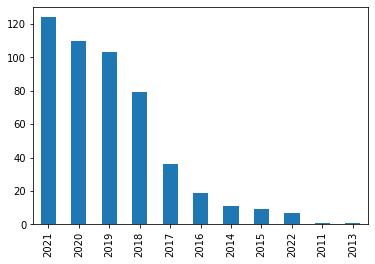

In [ ]:
year_count.plot (kind = "bar")
print(year_count.plot)

On the x there is year span, on the y axis the related frequency.
The bar plot allows the visualization of few data points, but more in detail. We are selecting the most frequent values and comparing the publication years. 
On the x axis there are the years present in the dataframe, while on the y axis there is the frequency of occurrancy.
The most frequent publication year was 2021 with 124 publications, 2020 has 110 publications, 2019 has 103, 2018 has 79, 2017 has 36, 2016 has 19, 2014 has 11, 2015 has 9, 2022 has 7, while 2011 and 2013 have 1. 

<AxesSubplot:>

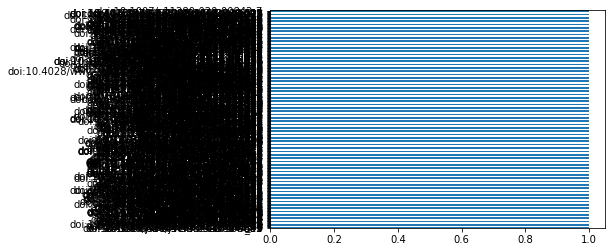

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
id_count.head(5)
id_count.plot(kind = "area")

Graphically the id count is not representable, because the number is too high. All the ids are different, so the above bar shows exactly that. 

<AxesSubplot:>

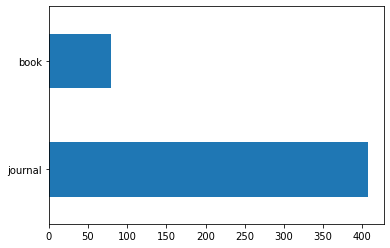

In [ ]:
venue_count.plot (kind = "barh")


The graph above takes as input the venues where the publications were published (on the y axis) and the frequency of that selected place (on the x axis). 93 publications are in book venue, while 407 are in journal venue.

<AxesSubplot:ylabel='Frequency'>

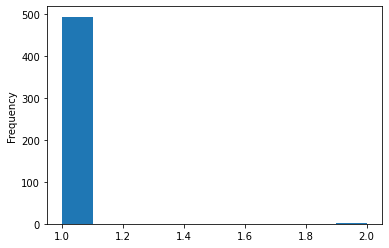

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
title_count.head(5)
title_count.plot(kind = "hist")

Histograms are useful to analyse the distribution of a property, they are ways to analyse the data distribution across a dataset. Histograms group values into bins and display a count of data points in that particular bin. The display looks different from normal distribution (symmetric bell shape with a peak in the middle).
The title majority is unique, so the above graph doesn't tell us anything new. Th outliers are on the right, but it doesn't show us much else. Outliers can indicate also invalid data, the investigation is an important step in data cleaning.

<AxesSubplot:ylabel='title'>

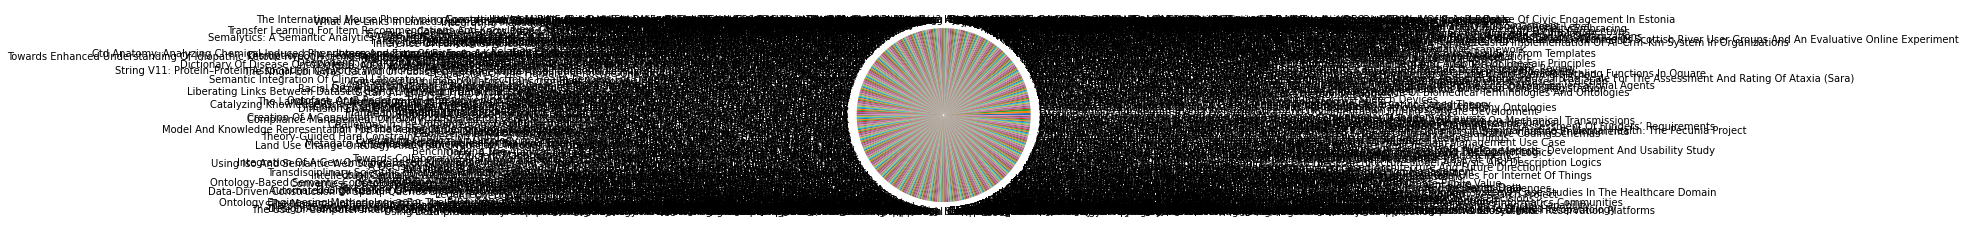

In [ ]:
title_count.plot(kind = "pie")

Analysing data titles is not relevant, because as we can see from the data they are all different values.

<AxesSubplot:>

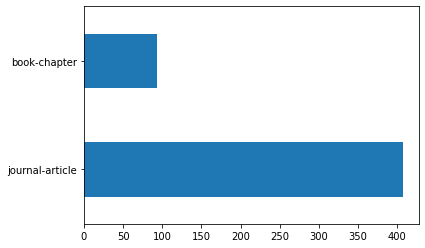

In [ ]:
type_count.plot (kind = "barh")


On the y axis there is the publications type, on the x axis its frequency. The above graph visually show us that 400 publications have type journal-article, while the remaining 100 have type book-chapter.

<AxesSubplot:>

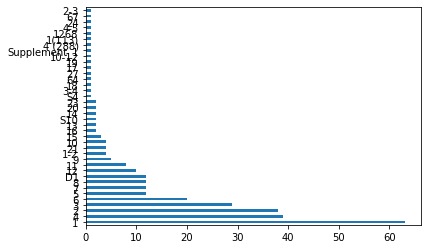

In [ ]:
pd.set_option ("display.max.columns", None)
issue_count.head(5)
issue_count.plot(kind = "barh")

On the y axis there are the issues, on the x axis their frequency. The issue count plot allows to visualize in which issue are the majority of the publications, which is issue 1 (more than 60), issue 2 (a little less than 40).

<AxesSubplot:ylabel='volume'>

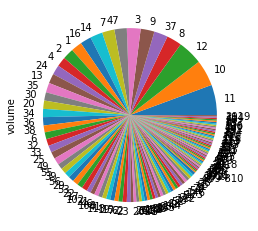

In [ ]:
pd.set_option ("display.max.columns", None)
volume_counts.head(5)
volume_counts.plot(kind = "pie")

I have chosen to display the publication volumes in a piechart, in order to visualize the most frequent volume in which there they were published. Although the visualization is not the best, we can understand that the majority of publications were in volume 11, 10, 12, 8 and 37.

<AxesSubplot:ylabel='Frequency'>

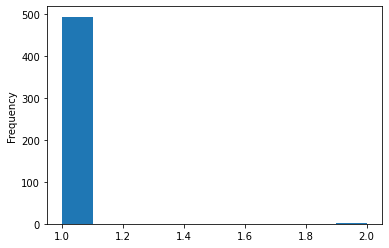

In [ ]:
pd.set_option ("display.max.columns", None)
title_count.head(5)
title_count.plot(kind = "hist")

Title_count is not a correct parameter to display in a hist graph, because almost all titles are different, so finding a useful correlation for a statistical survey is impossible.

<AxesSubplot:>

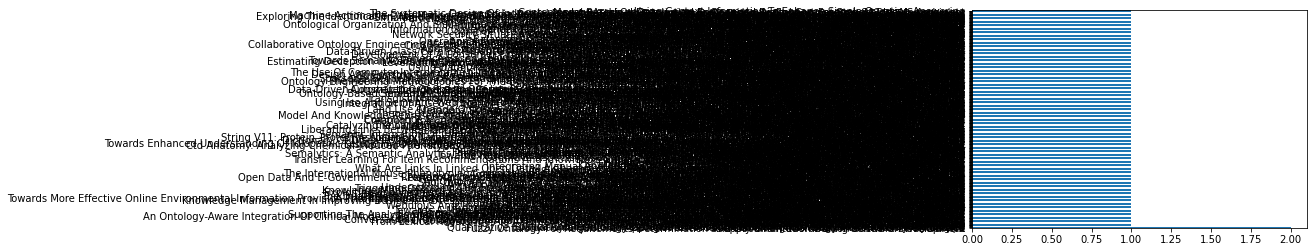

In [ ]:
title_count.plot(kind = "barh")

As suggested in the above markdown, all the titles have the same frequency being all different. So a graphical representation of non comparable data is not advised.

<AxesSubplot:>

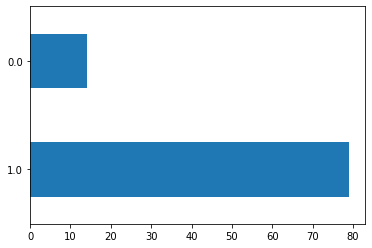

In [ ]:
chapter_counts.plot (kind = "barh")


#publisher_count.plot (kind = "barh")

On the x axis there is the frequency, while on the y axis there is the chapter numbers. 
The majority of chapters are empty, so the graph only shows the chapter numbers where present: nearly 80 publications have chapter 1, more than 10 publications have chapter 0. This result is not really relevant because the data majority regarding chapters is empty.

<AxesSubplot:>

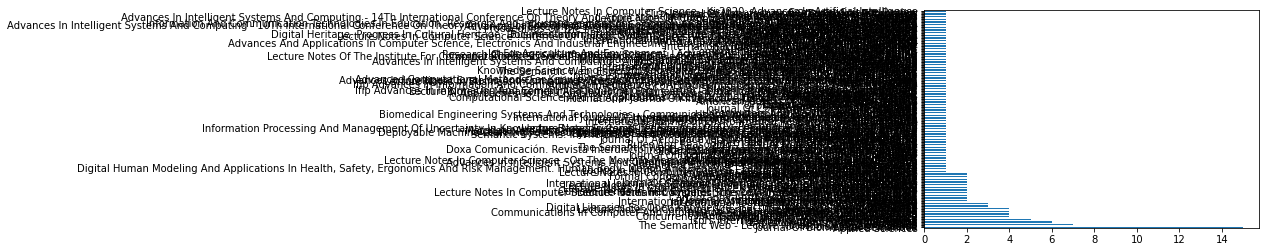

In [ ]:
pd.set_option ("display.max.columns", None)
publication_count.head(5)
publication_count.plot(x = ["Applied Sciences", "Journal Of Biomedical Semantics", "Nucleic Acids Research", "Expert Systems", "The Semantic Web - Lecture Notes In Computer Science"], kind = "barh")

Displaying on graph the publication_venue values is tricky due to the high volume of data. The majority of venues are different, so this test is not statistically relevant.

<AxesSubplot:>

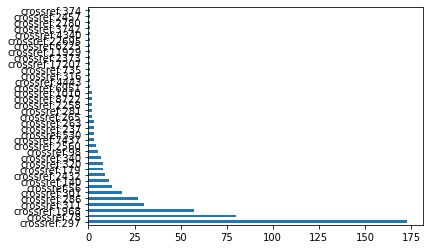

In [ ]:
publisher_count.plot (kind = "barh")

The publisher count plot shows the frequency (x) of occurrency of the same publisher (y) among the publications. The most frequent publisher is the last one displayes: crossref 297 which has almost 175 publications.

As for event we are not considering it in this counting and plot, being a key with empty values.

A barh plot is a graph representing quantitative data in horizontal rectangles with constant heights. The rectangular bars'lenghts are proportional to the values they represent. A bar plot shows the comparison between our categories.
On the y axis it shows the publisher, on the x axis it shows the frequency of occurrance. 

In [ ]:
id_count_sorted = id_count.sort_index()
print(id_count_sorted)

title_count_sorted = title_count.sort_index()
print(title_count_sorted)

type_count_sorted = type_count.sort_index()
print(type_count_sorted)

year_count_sorted = year_count.sort_index()
print(year_count_sorted)

issue_count_sorted = issue_count.sort_index()
print(issue_count_sorted)

volume_counts_sorted = volume_counts.sort_index()
print(volume_counts_sorted)

publication_count_sorted = publication_count.sort_index()
print(publication_count_sorted)

chapter_counts_sorted = chapter_counts.sort_index()
print(chapter_counts_sorted)

venue_count_sorted = venue_count.sort_index()
print(venue_count_sorted)

publisher_count_sorted = publisher_count.sort_index()
print(publisher_count_sorted)

doi:10.1002/1873-3468.14067                        1
doi:10.1002/ajmg.a.62239                           1
doi:10.1002/bse.2855                               1
doi:10.1002/cpe.4186                               1
doi:10.1002/cpe.4489                               1
                                                  ..
doi:10.4028/www.scientific.net/amm.809-810.1281    1
doi:10.4258/hir.2018.24.4.376                      1
doi:10.5028/jatm.v12.1098                          1
doi:10.7466/jfbl.2020.38.4.1                       1
doi:10.7717/peerj-cs.777                           1
Name: id, Length: 500, dtype: int64
A Built Heritage Information System Based On Point Cloud Data: His-Pc                                  1
A Comprehensive Review Of Type-2 Fuzzy Ontology                                                        1
A Conceptual Approximation Toward Occupational Safety And Health Within The Servitized Industry 4.0    1
A Dataset For Web-Scale Knowledge Base Population                 

The function .sort_index() takes as input the counted objects' Series while generating a new ordered Series. It sorts Series by index labels and also returns the total object counts (thanks to the count function).
The data appears alphabetically ordered,


The final step is that of graph analysis. The available graph visualizations are a lot, I tried choosing the correct visualization for each Series type.

<AxesSubplot:>

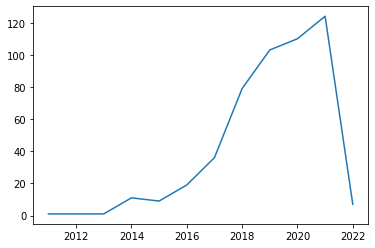

In [ ]:
year_count_sorted.plot()

The sorted year count plot display the years ascendently on the x axis, while showing the publication frequency on the y axis. I haven't specified any 'kind' parameter so the result is a line graph.

<AxesSubplot:>

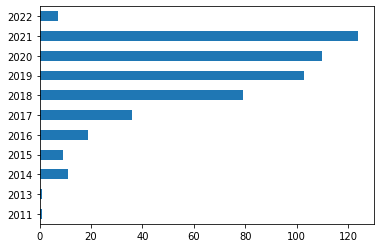

In [ ]:
year_count_sorted.plot(kind = "barh")

The y axis displays the years (being a barh horizontal plot), while the x displays their frequency. By passing the plot kind barh on year counted sorted it is possible to visalize the years into a horizontal plot, descendently ordered. This way it is easier to see that most publications are in year 2021, followed by 2020, 2019, 2018, 2017, 2016, 2014, 2015, 2022, 2013 and 2011.

<AxesSubplot:>

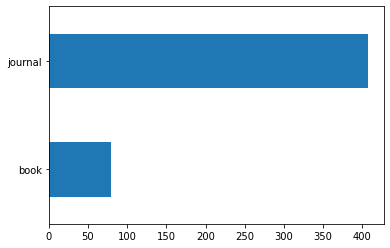

In [ ]:
venue_count_sorted.plot(kind = "barh")

On the y axis there are the venues, on the x axis their frequency.
The plot of venue_count_sorted shows that the majority of publications are in venue journal, while some publications have venue book.

<AxesSubplot:>

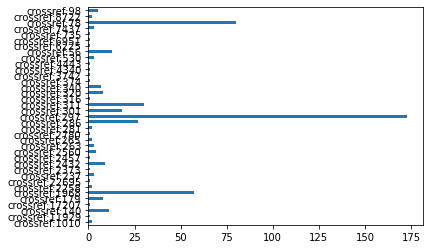

In [ ]:
publisher_count_sorted.plot(kind = "barh") 


The publisher_count sorted plot retrieves the publisher crossref number in ascendent order (y axis), showing the frequency of their publications (x axis).
The most frequent publisher is crossref:297, followed by crossref:78. 
Due to the high amount of data, the display is not the best and publishers are overlapping on the y axis.

<AxesSubplot:>

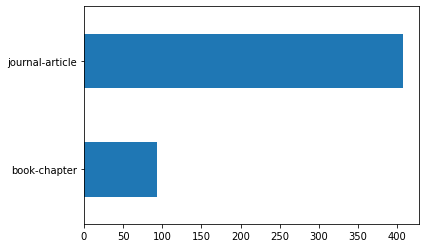

In [ ]:
type_count_sorted.plot(kind = "barh")

On the y axis there is the type, on the x axis its frequency.
Being ordered or not, the type_count plot always shows the type frequency (x axis) and the values remain constant. The majority of publications have type journal article.

<AxesSubplot:ylabel='title'>

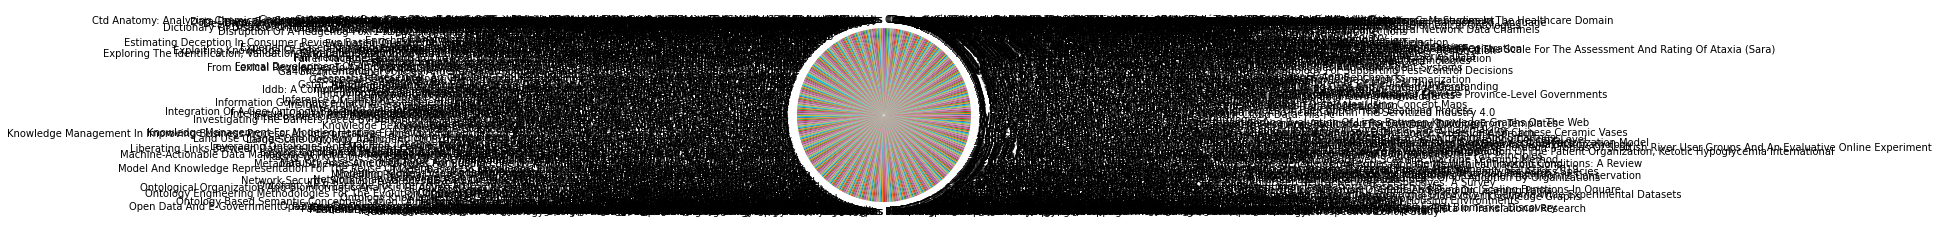

In [ ]:
pd.set_option ("display.max.columns", None)
title_count_sorted.head(5)
title_count_sorted.plot(kind = "pie")

The graph above is pointless: the titles are unique and their visualization doesn't order nor group them anyhow.

<AxesSubplot:>

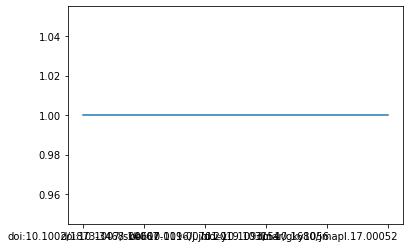

In [ ]:
id_count_sorted.plot()


Same thing for ids, all publications have a related id, but they don't need a graph representation, being all unique values.

<AxesSubplot:>

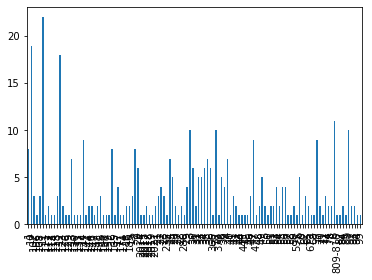

In [ ]:
volume_counts_sorted.plot(kind = "bar")

Plotting count volumes is tricky because some publications have no volume assigned, hence the results are imprecise. The histogram above shows the most frequent (y) assigned volumes (x), but the volumes numbers are a lot and it is difficult to see them more in detail. Statistically speaking this in depth analysis is not that relevant.

In [ ]:
#serialization

from json import load
with open ("graph_other_data.json", "r", encoding="utf=8") as f:
    json_doc = load(f)
    
data = json_doc["authors"]

doi = []
family = []
given = []
orcid = []

for item in data :
    authors = data[item]
    for a in authors:
        doi.append(item)
        family.append(a["family"])
        given.append(a["given"])
        orcid.append(a["orcid"])
        
        print(item, a["family"], a["given"], a["orcid"])
        



doi:10.1016/j.websem.2021.100655 Espinoza-Arias Paola 0000-0002-3938-2064
doi:10.1016/j.websem.2021.100655 Garijo Daniel 0000-0003-0454-7145
doi:10.1016/j.websem.2021.100655 Corcho Oscar 0000-0002-9260-0753
doi:10.1007/s10115-017-1100-y Diefenbach Dennis 0000-0002-0046-2219
doi:10.1016/j.websem.2014.03.003 Groth Paul 0000-0003-0183-6910
doi:10.1016/j.websem.2014.03.003 Gray Alasdair J.G. 0000-0002-5711-4872
doi:10.1016/j.websem.2014.03.003 Harland Lee 0000-0003-0461-0028
doi:10.1093/nar/gkz997 Shefchek Kent A 0000-0001-6439-2224
doi:10.1093/nar/gkz997 Vasilevsky Nicole 0000-0001-5208-3432
doi:10.1093/nar/gkz997 Balhoff James P 0000-0002-8688-6599
doi:10.1093/nar/gkz997 Jupp Simon 0000-0002-0643-3144
doi:10.1093/nar/gkz997 Köhler Sebastian 0000-0002-5316-1399
doi:10.1093/nar/gkz997 Robinson Peter N 0000-0002-0736-9199
doi:10.1093/nar/gkz997 Munoz-Torres Monica C 0000-0001-8430-6039
doi:10.3390/publications7030050 Jansen Gregory 0000-0001-6591-6595
doi:10.1017/s0269888920000065 Kotis Kon

JSON is a file format which stands for "JavaScript Object Notation": a script file made of text which allows storing and transferring data.
The process of encoding JSON is called serialization: the tranformation of data into a series of bytes to be stored and transmitted.

By importing "json", Python start reading the json file.
The "open" function is neeeded in order to read the JSON file.
The json function .load() takes as input a file object and returns the json object, it is needed to output a dictionary named data. 
A JSON object contains data in the form of key/value pairs: keys being strings and values being JSON types, similarly to a Python dictionary.

We create 4 empty lists where to store (.append) the dictionary keys and values.

In [ ]:
from pandas import DataFrame
from pandas import Series
data = DataFrame({
    "doi" : Series(doi, dtype = "string"),
    "family" : Series(family, dtype = "string"),
    "given" : Series(given, dtype = "string"),
    "orcid" : Series(orcid, dtype = "string")
})
print (data)

                                   doi          family    given  \
0     doi:10.1016/j.websem.2021.100655  Espinoza-Arias    Paola   
1     doi:10.1016/j.websem.2021.100655          Garijo   Daniel   
2     doi:10.1016/j.websem.2021.100655          Corcho    Oscar   
3        doi:10.1007/s10115-017-1100-y      Diefenbach   Dennis   
4     doi:10.1016/j.websem.2014.03.003           Groth     Paul   
...                                ...             ...      ...   
1427               doi:10.1145/3309547            Wang    Xiang   
1428  doi:10.1007/978-3-030-58285-2_27          Martin     Leon   
1429  doi:10.1007/978-3-030-58285-2_27       Boockmann   Jan H.   
1430  doi:10.1007/978-3-030-58285-2_27         Henrich  Andreas   
1431    doi:10.1007/s11280-020-00842-7              Li      Lin   

                    orcid  
0     0000-0002-3938-2064  
1     0000-0003-0454-7145  
2     0000-0002-9260-0753  
3     0000-0002-0046-2219  
4     0000-0003-0183-6910  
...                   ...  

The text in JSON is executed through a quoted-string containing the value in key mapping within {}.
Keys and values are separated by a colon and each entry (key/value pair) is separated by a comma. 

Due to the fact that the values are not comparable values, it is not possible to compute mean, median and standard deviation. The found solution is that of computing only the counts for each class.

In [ ]:
#statistics
print("Categories describing dois")
data_count = data["doi"].value_counts()
print(data_count)
print("Categories describing surnames")
data_count2 = data["family"].value_counts()
print(data_count2)
print("Categories describing names")
data_count3 = data["given"].value_counts()
print(data_count3)
print("Categories describing orcids")
data_count4 = data["orcid"].value_counts()
print(data_count4)

Categories describing dois
doi:10.1016/j.xgen.2021.100029         160
doi:10.1038/sdata.2016.18               46
doi:10.1016/j.xgen.2021.100028          39
doi:10.1101/2021.06.23.21259416         31
doi:10.3390/en14206692                  20
                                      ... 
doi:10.1111/nbu.12482                    1
doi:10.1017/s0890060421000147            1
doi:10.4018/978-1-7998-6874-3.ch006      1
doi:10.1017/s0269888918000139            1
doi:10.1007/s11280-020-00842-7           1
Name: doi, Length: 526, dtype: Int64
Categories describing surnames
Zhang        15
Wang         13
Robinson     11
Li           10
Hoehndorf    10
             ..
Dai           1
Xiong         1
Hossain       1
Yager         1
Henrich       1
Name: family, Length: 1094, dtype: Int64
Categories describing names
David           12
Paul            11
Robert          10
Rafael           9
Sebastian        9
                ..
Ammar            1
Joel E.          1
Julius O.        1
Elizabeth L.    

By using the counting values method we are retrieving grouped data: 160 publications have doi 10.1016/j.xgen.2021.100029, 46 have doi 10.1038/sdata.2016.18, 39 have doi doi:10.1016/j.xgen.2021.100028, 31 have doi doi:10.1101/2021.06.23.21259416 and 20 have doi doi:10.3390/en14206692.
The authors' family names which have multiple publications are Zhang with 15 occurrances, Wang with 13, Robinson with 11, Li with 10 and Hoehndorf with 10.
Even if some authors have the same name, they are not actually related to one another, having different family and orcid.
Some orcids are repeated: 0000-0002-0736-9199 has 11 occurrances,0000-0001-8149-5890 has 10, 0000-0003-2457-1791 has 8, 0000-0003-0183-6910 has 6 and 0000-0003-2667-5359 has 6.

In [ ]:
#uniqueness
print ("--categories describing names")
d = data["given"].unique()
print(d)

print ("--categories describing surnames")
d1 = data["family"].unique()
print(d1)

print ("--categories describing orcid")
d2 = data["orcid"].unique()
print(d2)

--categories describing names
<StringArray>
[        'Paola',        'Daniel',         'Oscar',        'Dennis',
          'Paul', 'Alasdair J.G.',           'Lee',        'Kent A',
        'Nicole',       'James P',
 ...
     'Joshua F.',        'Obi L.',         'Ahmet',         'Suzan',
       'Arkaitz',          'Aiqi',       'Wenfeng',          'Leon',
        'Jan H.',           'Lin']
Length: 1052, dtype: string
--categories describing surnames
<StringArray>
['Espinoza-Arias',         'Garijo',         'Corcho',     'Diefenbach',
          'Groth',           'Gray',        'Harland',       'Shefchek',
     'Vasilevsky',        'Balhoff',
 ...
        'Coffman',      'Mcmichael',       'Yıldırım',      'Uskudarli',
        'Zubiaga',          'Jiang',            'Hou',         'Martin',
      'Boockmann',        'Henrich']
Length: 1094, dtype: string
--categories describing orcid
<StringArray>
['0000-0002-3938-2064', '0000-0003-0454-7145', '0000-0002-9260-0753',
 '0000-0002-0046-

By using the .unique() function we are analysing the uniqueness of our data and retrieving all unique occurrances.

In [ ]:
a = data.query('doi =="doi:10.3390/info11030129"')
print(a)

b = data.query('family =="Jansen"')
print(b)

c = data.query('given =="Albert"')
print(data)

d = data.query('orcid=="0000-0001-5565-7577"')
print(d)

                         doi          family  given                orcid
16  doi:10.3390/info11030129  Espinoza-Arias  Paola  0000-0002-3938-2064
17  doi:10.3390/info11030129          Corcho  Oscar  0000-0002-9260-0753
                                doi  family    given                orcid
14  doi:10.3390/publications7030050  Jansen  Gregory  0000-0001-6591-6595
                                   doi          family    given  \
0     doi:10.1016/j.websem.2021.100655  Espinoza-Arias    Paola   
1     doi:10.1016/j.websem.2021.100655          Garijo   Daniel   
2     doi:10.1016/j.websem.2021.100655          Corcho    Oscar   
3        doi:10.1007/s10115-017-1100-y      Diefenbach   Dennis   
4     doi:10.1016/j.websem.2014.03.003           Groth     Paul   
...                                ...             ...      ...   
1427               doi:10.1145/3309547            Wang    Xiang   
1428  doi:10.1007/978-3-030-58285-2_27          Martin     Leon   
1429  doi:10.1007/978-3-030-58

The purpose of doing queries is that of having a more in depth data analysis. I have chosen to compute queries after counting data and its uniqueness, understanding that only non unique values can be queried in order to group similar data.

By writing data.query('doi =="doi:10.3390/info11030129"') we are retrieving all the publications under that specific doi and showing it on the dataframe.


<AxesSubplot:ylabel='doi'>

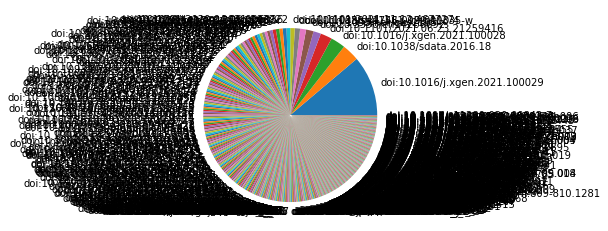

In [ ]:
#plotting graphs

data_count.plot(kind = "pie")


#data_count3.plot()

#data_count4.plot (kind = "bar")
#data_count4.plot()


This pie charts allows to visualize the frequency of occurrance of dois, but being the data too big, the visualization is confusing and id values are overlapping, hence I tried using different kinds of graphs for a better visualization,

<AxesSubplot:>

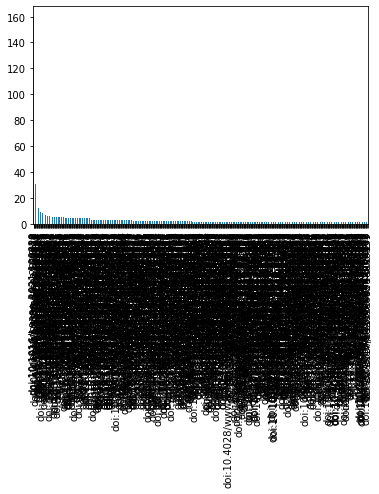

In [ ]:
data_count.plot (kind = "bar")

It is relevant to plot data which can be compared among each other. Being dois (x axis) and orcids unique values, it doesn't make sense to analyse their frequency (y axis), when they don't tell us any new information. Hence, the key which groups more values is that of dois.

<AxesSubplot:>

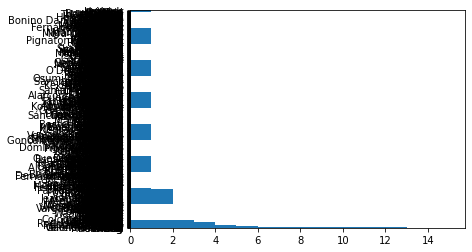

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count2.head(5)
data_count2.plot(x = "orcid", kind = "barh")

Having a huge amount of data doesn't stand for a proper visualization, but it is possible to understand that some authors are present multiple times.
On the y axis there are the given names, while on the x axis their frequency. This graph is not relevant because comparing if different authors have the same name is not statistically significant.

<AxesSubplot:ylabel='given'>

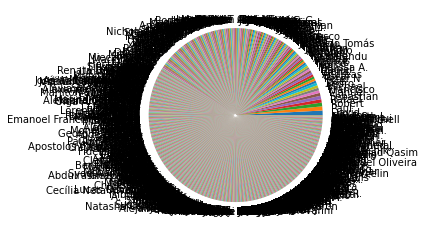

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count3.head(5)
data_count3.plot(x = "orcid", kind = "pie")

Doing a graph on given names it's pointless because looking into authors having the same name doesn't show relevant information.

<AxesSubplot:>

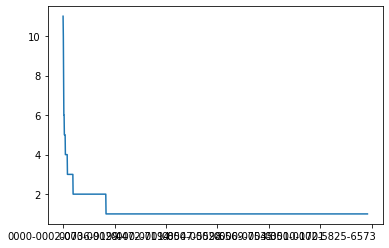

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count4.head()
data_count4.plot()

Some orcids (x axis) are repeted for authors, but they this data visualization is not efficient and the results are not relevant, being the data overlapping due to the high amount of numbers.

<AxesSubplot:>

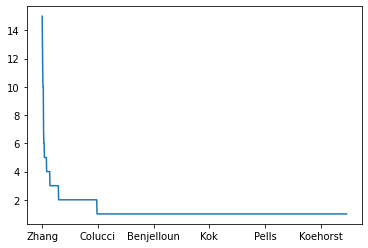

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count2.head()
data_count2.plot()

Family names on the x axis, their frequency on the y axis. Some authors are repeated multiple times on our JSON file: Khang has 14 occurrances.

<AxesSubplot:>

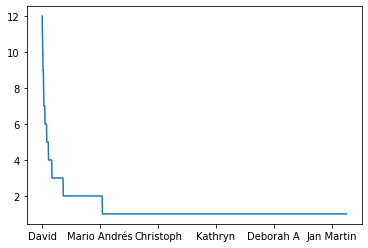

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count3.head(5)
data_count3.plot()

As stated before, the above graph is not relevant, because it is not interesting seeing how many authors are named David.

<AxesSubplot:ylabel='Frequency'>

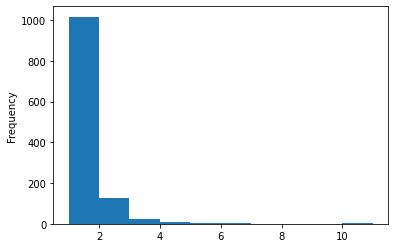

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count4.head(5)
data_count4.plot(x = "orcid", kind = "hist")

By displaying orcids into a hist, the majority of data is lost and we don't have a clear data visualization. The hist is unable to read the values (which should be on the x axis) and the frequency (y axis) result is unattendable.

<AxesSubplot:ylabel='orcid'>

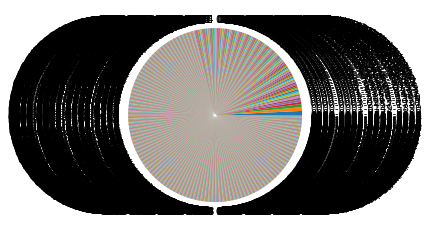

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count4.head(5)
data_count4.plot(x = "orcid", kind = "pie")

By visualizing orcid data in a pie it is more clear that most orcids are different, seeing that all pie parts are almost invisible. This analysis (orcidxfrequency) is therefore unattendable.

In [ ]:
data_count_sorted =  data_count.sort_index()
print(data_count_sorted)
data_count2_sorted =  data_count2.sort_index()
print(data_count2_sorted)
data_count3_sorted =  data_count3.sort_index()
print(data_count3_sorted)
data_count4_sorted =  data_count4.sort_index()
print(data_count4_sorted)

doi:10.1002/1873-3468.14067                        6
doi:10.1002/ajmg.a.62239                           1
doi:10.1002/bse.2855                               1
doi:10.1002/cpe.4186                               1
doi:10.1002/cpe.4489                               1
                                                  ..
doi:10.4028/www.scientific.net/amm.809-810.1281    1
doi:10.4258/hir.2018.24.4.376                      1
doi:10.5028/jatm.v12.1098                          5
doi:10.7466/jfbl.2020.38.4.1                       3
doi:10.7717/peerj-cs.777                           4
Name: doi, Length: 526, dtype: Int64
Aalbersberg       1
Abad-Navarro      1
Abdullah          1
Abdullahi         1
Abeln             1
                 ..
Çelik Ertuğrul    1
Öztürk            1
Şimşek            1
Šormaz            1
’T Hoen           1
Name: family, Length: 1094, dtype: Int64
A.                1
A. Ravishankar    1
Aaron             1
Aaron M.          4
Abdelouahed       1
                 ..

Now sorting data, so that in our graphs it will be possible to visualize them in ascendent order.

<AxesSubplot:ylabel='doi'>

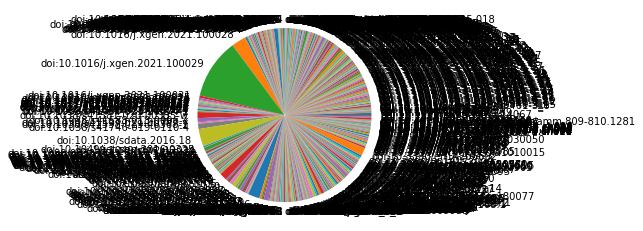

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count_sorted.head(5)
data_count_sorted.plot(x = "orcid", kind = "pie")

The huge amount of data doesn't allow clarity of visualization. We can see that the same dois are repeted throughout the Json file. From the size of the green pie piece,the most frequent doi is doi:10.1016/j.xgen.2021.100029. 


<AxesSubplot:>

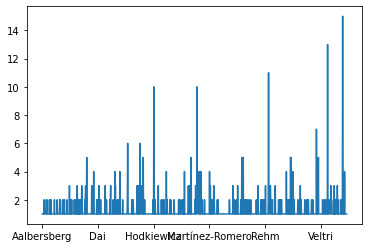

In [ ]:
data_count2_sorted.plot()

Family names previously alphabetically ordered are displayed on the x axis, correlated to the frequency on the y axis, it is possible to see that some authors (as Veltri) are present multiple times.

<AxesSubplot:>

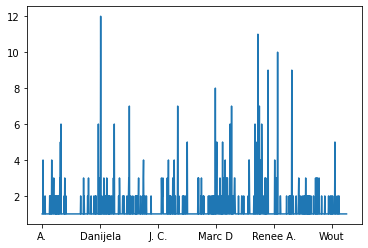

In [ ]:
data_count3_sorted.plot()


It is not necessary to do graphs on given names, because they are randomly assigned and not correlated to our search.
On the x axis there are the values names, on the y axis the frequency of occurrency.

Plotting a graph on sorted dois allows to visualize data from the lowest to the highest doi, but it doesn't give us any more clearness upon their meaning. Maybe the graph type is wrong, let's try with pie charts.

<AxesSubplot:ylabel='doi'>

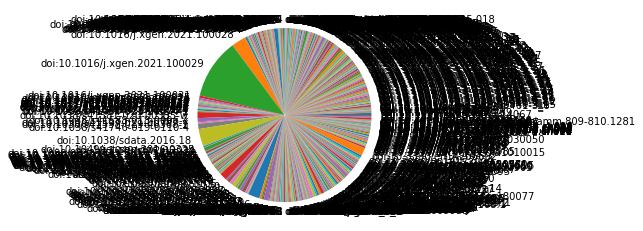

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count_sorted.head(5)
data_count_sorted.plot(kind = "pie")

By visualizing dois on a piechart it is possible to confirm that there are some shared dois among authors and that the most frequent doi is doi:10.1016/j.xgen.2021.100029. Anyhow the visualization appears confused due to the high amount of data.

<AxesSubplot:>

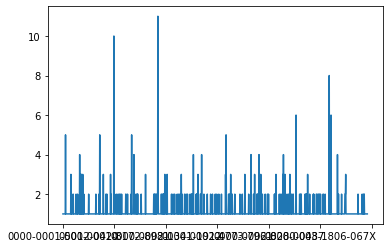

In [ ]:
import pandas as pd
pd.set_option ("display.max.columns", None)
data_count4_sorted.head(5)
data_count4_sorted.plot()

The final data analysis on orcids shows that some orcids have multiple occurrances. 




In [ ]:
from json import load
with open("relational_other_data.json", "r", encoding="utf-8") as f:
    json_doc = load(f)
    
relation =json_doc["authors"]

doi=[]
family=[]
given=[]
orcid=[]

for item in relation:
    values = relation[item]
    for v in values:
        doi.append(item)
        family.append(v["family"])
        given.append(v["given"])
        orcid.append(v["orcid"])

        print(item, v["family"], v["given"], v["orcid"])


doi:10.1162/qss_a_00023 Peroni Silvio 0000-0003-0530-4305
doi:10.1162/qss_a_00023 Shotton David 0000-0001-5506-523X
doi:10.1007/s11192-019-03217-6 Heibi Ivan 0000-0001-5366-5194
doi:10.1007/s11192-019-03217-6 Peroni Silvio 0000-0003-0530-4305
doi:10.1007/s11192-019-03217-6 Shotton David 0000-0001-5506-523X
doi:10.1007/s11192-019-03311-9 Zhu Yongjun 0000-0003-4787-5122
doi:10.1038/sdata.2016.18 Wilkinson Mark D. 0000-0001-6960-357X
doi:10.1038/sdata.2016.18 Dumontier Michel 0000-0003-4727-9435
doi:10.1038/sdata.2016.18 Aalbersberg Ijsbrand Jan 0000-0002-0209-4480
doi:10.1038/sdata.2016.18 Appleton Gabrielle 0000-0003-0179-7384
doi:10.1038/sdata.2016.18 Axton Myles 0000-0002-8042-4131
doi:10.1038/sdata.2016.18 Baak Arie 0000-0003-2829-6715
doi:10.1038/sdata.2016.18 Blomberg Niklas 0000-0003-4155-5910
doi:10.1038/sdata.2016.18 Boiten Jan-Willem 0000-0003-0327-638X
doi:10.1038/sdata.2016.18 Da Silva Santos Luiz Bonino 0000-0002-1164-1351
doi:10.1038/sdata.2016.18 Bourne Philip E. 0000-0002

JSON is a file format which stands for "JavaScript Object Notation": a script file made of text which allows storing and transferring data.
The process of encoding JSON is called serialization: the tranformation of data into a series of bytes to be stored and transmitted.

By importing "json", Python start reading the json file.
The "open" function is neeeded in order to read the JSON file.
The json function .load() takes as input a file object and returns the json object, it is needed to output a dictionary named data. 
A JSON object contains data in the form of key/value pairs: keys being strings and values being JSON types, similarly to a Python dictionary.

We create 4 empty lists where to store (.append) the dictionary keys and values.

In [ ]:
from pandas import DataFrame
from pandas import Series
relation = DataFrame({
    "doi" : Series(doi, dtype = "string"),
    "family" : Series(family, dtype = "string"),
    "given" : Series(given, dtype = "string"),
    "orcid" : Series(
        orcid, dtype="string")
})
print(relation)



                                    doi    family           given  \
0               doi:10.1162/qss_a_00023    Peroni          Silvio   
1               doi:10.1162/qss_a_00023   Shotton           David   
2        doi:10.1007/s11192-019-03217-6     Heibi            Ivan   
3        doi:10.1007/s11192-019-03217-6    Peroni          Silvio   
4        doi:10.1007/s11192-019-03217-6   Shotton           David   
...                                 ...       ...             ...   
1133  doi:10.1080/00472778.2020.1776578    Amorós      J. Ernesto   
1134     doi:10.1007/s11301-020-00196-4     Simao  Lurdes Barroso   
1135     doi:10.1007/s11301-020-00196-4  Carvalho    Luísa Cagica   
1136     doi:10.1007/s11301-020-00196-4   Madeira      Maria José   
1137  doi:10.1080/08989621.2020.1836620       Ali           Imran   

                    orcid  
0     0000-0003-0530-4305  
1     0000-0001-5506-523X  
2     0000-0001-5366-5194  
3     0000-0003-0530-4305  
4     0000-0001-5506-523X  
...

We have created the dataframe in python, having as column names the keys: doi, family, given and orcid, while as rows their associated values.

In [ ]:
d = relation.query ('doi=="doi:10.1016/j.autcon.2020.103490"')
print(d)
a = relation.query('family=="Brooks"')
print(a)
gi = relation.query('given=="Tim"')
print(gi)

oc = relation.query('orcid=="0000-0003-1304-1939"')
print(oc)

                                  doi family      given                orcid
451  doi:10.1016/j.autcon.2020.103490   Shen  Shui-Long  0000-0002-5610-7988
452  doi:10.1016/j.autcon.2020.103490   Zhou      Annan  0000-0001-5209-5169
Empty DataFrame
Columns: [doi, family, given, orcid]
Index: []
                          doi family given                orcid
17  doi:10.1038/sdata.2016.18  Clark   Tim  0000-0003-4060-7360
                          doi  family  given                orcid
18  doi:10.1038/sdata.2016.18  Crosas  Mercè  0000-0003-1304-1939


Queries are useful to retrieve the information corresponding to the selected keys and values. The first query retrieves the doi doi:10.1016/j.autcon.2020.103490 ant its associated values. The second query retrieves all the information associated to the Brooks family. The third query retrieves the occurrances of Tim, while the last query retrieves the information linked to that specific orcid.

In [ ]:
#uniqueness
print ("--categories describing dois")
dd = relation["doi"].unique()
print(dd)
print ("--categories describing families")
rr = relation["family"].unique()
print(rr)
print ("--categories describing names")
gg = relation["given"].unique ()
print(gg)
print ("--categories describing orcid")
oo = relation["orcid"].unique ()
print(oo)



--categories describing dois
<StringArray>
[          'doi:10.1162/qss_a_00023',    'doi:10.1007/s11192-019-03217-6',
    'doi:10.1007/s11192-019-03311-9',         'doi:10.1038/sdata.2016.18',
  'doi:10.1371/journal.pbio.3000385',             'doi:10.3233/ds-190016',
    'doi:10.1007/s11192-020-03397-6',    'doi:10.1186/s13321-020-00448-1',
  'doi:10.1007/978-3-030-61244-3_16',   'doi:10.1007/978-3-030-61244-3_6',
 ...
      'doi:10.1108/jic-02-2020-0054',      'doi:10.1108/jic-05-2020-0142',
 'doi:10.3897/neotropical.15.e52905',        'doi:10.3390/admsci10030057',
        'doi:10.3390/admsci10030069',              'doi:10.1101/19001305',
    'doi:10.1186/s12888-020-02825-4', 'doi:10.1080/00472778.2020.1776578',
    'doi:10.1007/s11301-020-00196-4', 'doi:10.1080/08989621.2020.1836620']
Length: 508, dtype: string
--categories describing families
<StringArray>
[     'Peroni',     'Shotton',       'Heibi',         'Zhu',   'Wilkinson',
   'Dumontier', 'Aalbersberg',    'Appleton',       

The values are almost all unique, as seen in the dataframe above.

In [ ]:
print("Categories describing dois")
data_count = relation["doi"].value_counts()
print(data_count)
print("Categories describing names")
data_count2 = relation["family"].value_counts()
print(data_count2)
print("Categories describing surnames")
data_count3 = relation["given"].value_counts()
print(data_count3)
print("Categories describing orcids")
data_count4 = relation["orcid"].value_counts()
print(data_count4)

Categories describing dois
doi:10.1016/j.xgen.2021.100029         160
doi:10.1038/sdata.2016.18               46
doi:10.1016/j.xgen.2021.100028          39
doi:10.1101/2021.06.23.21259416         31
doi:10.3390/en14206692                  20
                                      ... 
doi:10.1111/nbu.12482                    1
doi:10.1017/s0890060421000147            1
doi:10.4018/978-1-7998-6874-3.ch006      1
doi:10.1017/s0269888918000139            1
doi:10.1007/s11280-020-00842-7           1
Name: doi, Length: 526, dtype: Int64
Categories describing names
Zhang        15
Wang         13
Robinson     11
Li           10
Hoehndorf    10
             ..
Dai           1
Xiong         1
Hossain       1
Yager         1
Henrich       1
Name: family, Length: 1094, dtype: Int64
Categories describing surnames
David           12
Paul            11
Robert          10
Rafael           9
Sebastian        9
                ..
Ammar            1
Joel E.          1
Julius O.        1
Elizabeth L.    

Through the value_counts method we can see that some values are shared among the json file.
doi:10.1016/j.xgen.2021.100029 has 160 occurrances, doi:10.1038/sdata.2016.18 is present 46 times, doi:10.1016/j.xgen.2021.100028 39, doi:10.1101/2021.06.23.21259416 31 and doi:10.3390/en14206692 20.
Zhang has 15 occurrances, Wang 13, Robinson 11, Li 10 and Hoendorf 10.
The information on authors' names is not important because even if multiple authors have the same names, names are randomly assigned variables.

<AxesSubplot:ylabel='doi'>

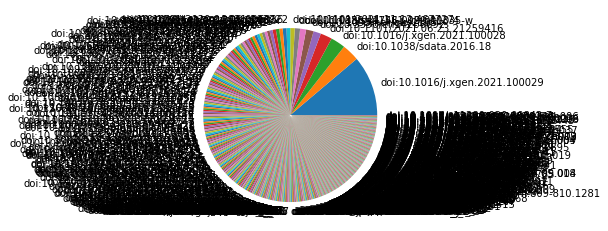

In [ ]:
data_count.plot (kind = "pie")

The dois frequency is confirmed with the above piechart. Even if dois are overlapping, we can understand that the majority of them only have one occurrance, even if 12 of them are present multiple times.

<AxesSubplot:>

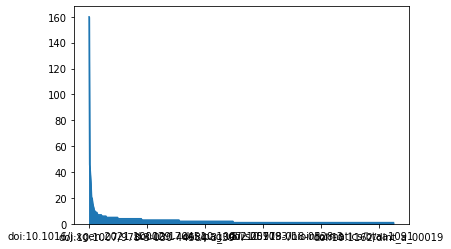

In [ ]:
data_count.plot (kind = "area")

This graph should represent dois on the x axis and their frequency on the y axis, through an area representation. Being the doi values too many, it is impossible to see their frequency clearly on the y axis.

<AxesSubplot:>

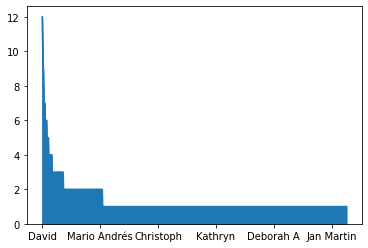

In [ ]:
data_count3.plot (kind = "area")

The above graph shows the given names (x axis) and their related correlation.

<AxesSubplot:>

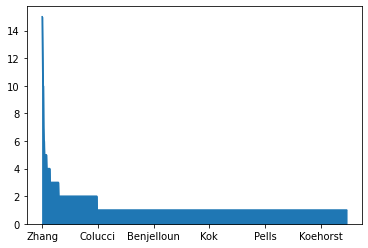

In [ ]:
data_count2.plot (kind = "area")

The authors (x) are present multiple times (y): Zhang 14, Colucci 2 and all others 1.

<AxesSubplot:>

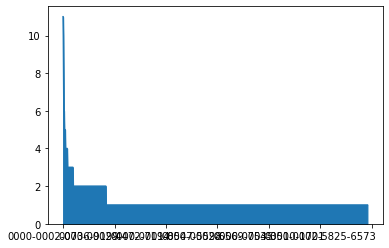

In [ ]:
data_count4.plot (kind = "area")

The above graph shows the orcid freqency, from the most occurring dois to the least occurred. Even though the visualization is non precise, we can understand that the orcid majority is present only 1 time throughought our json.

In [ ]:
data_count_sorted =  data_count.sort_index()
print(data_count_sorted)
data_count2_sorted =  data_count2.sort_index()
print(data_count2_sorted)
data_count3_sorted =  data_count3.sort_index()
print(data_count3_sorted)
data_count4_sorted =  data_count4.sort_index()
print(data_count4_sorted)


doi:10.1002/adom.202100519             5
doi:10.1002/agj2.20628                 1
doi:10.1002/asi.23267                  1
doi:10.1002/asi.23630                  1
doi:10.1002/asi.23770                  1
                                      ..
doi:10.4018/978-1-7998-7452-2.ch016    2
doi:10.4218/etrij.2018-0059            1
doi:10.7250/bjrbe.2020-15.470          4
doi:10.7717/peerj-cs.421               2
doi:10.7717/peerj.2567                 1
Name: doi, Length: 508, dtype: Int64
Aalbersberg       1
Abad-Segura       3
Abdel-Daim        1
Abdul             1
Abideen           1
                 ..
Zárate            1
Ávila-Robinson    1
Özdağoğlu         2
Župič             1
’T Hoen           1
Name: family, Length: 927, dtype: Int64
A.                  3
A. I. M. Jakaria    1
Abdul Hannan        1
Abel L.             1
Abolfazl            1
                   ..
Ziaul Haque         1
Zora                1
Élisabeth           1
Ö.F.                1
Şule Taşlı          1
Name: give

The above code allows to sort key values alphabetically or ascendently, in order to visualize them from a different point of view.

<AxesSubplot:>

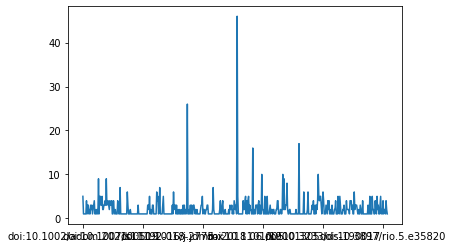

In [ ]:
data_count_sorted.plot()


<AxesSubplot:>

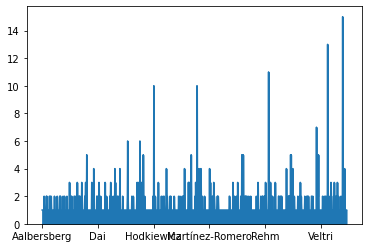

In [ ]:
data_count2_sorted.plot(kind = "area")

The ordered values for families are shown alphabetically on the x axis, while on the y axis there is the frequency of occurrancy of these authors.

<AxesSubplot:>

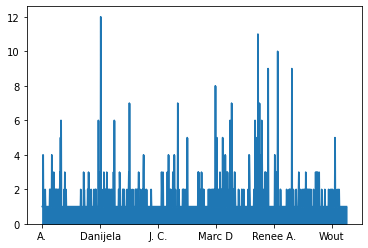

In [ ]:
data_count3_sorted.plot(kind = "area")
#data_count4_sorted.plot(kind = "area")

As stated before, analysing the given names correlation is pointless, but still I have computed it for documentation purposes.

<AxesSubplot:>

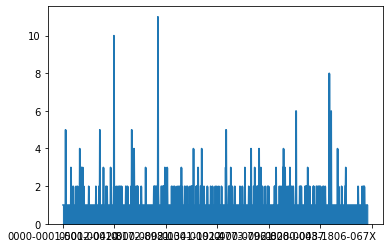

In [ ]:
data_count4_sorted.plot(kind = "area")

Lastly dois, ordered ascendently, are visualized through an area graph. The values are different, but some are repeted multiple times.

In [ ]:
from pandas import read_csv
authors = read_csv("relational_publications.csv")
authors.info()
authors.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    object 
 1   title              500 non-null    object 
 2   type               500 non-null    object 
 3   publication_year   500 non-null    int64  
 4   issue              347 non-null    object 
 5   volume             443 non-null    object 
 6   chapter            22 non-null     float64
 7   publication_venue  498 non-null    object 
 8   venue_type         498 non-null    object 
 9   publisher          498 non-null    object 
 10  event              0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
count,500,500,500,500.000000,347,443,22.000000,498,498,498,0.0
unique,500,500,2,NaN,31,149,NaN,295,2,32,NaN
top,doi:10.1162/qss_a_00023,"Opencitations, An Infrastructure Organization ...",journal-article,NaN,1,11,NaN,Scientometrics,journal,crossref:297,NaN
freq,1,1,478,NaN,69,29,NaN,50,478,145,NaN
mean,NaN,NaN,NaN,2019.558000,NaN,NaN,0.909091,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.512353,NaN,NaN,0.294245,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2014.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


Let's start by analizing relational_publications.csv. It is a dataframe made up of 500 entries about publications. The data is organized into the following classes (column names): id (doi number, for identification, type: float), title (string, publication title), type (which kind of publication it is), publication_year (the year it was published), the issue (if present), the volume (if present), the chapter (mostly absent), publication_venue (grouping topic of the publication), venue_type (publication type), publisher (crossref + id number), event (which is an empty Series). 
Event offers struggles, can't be queried, nor analysed, therefore it should be deleted from the orginal Json dataframe, more than 500 publications are enough proof to say that we won't need this key.

I have imported the pandas library "read_csv", called the variable containing the csv file,  without transforming the null objects into empty strings, in order to see how many empty cells there are.
I have called the method .info() to obtain information regarding this csv, through the method .describe () it is possible to visualize the dataframe in python.

relational_publications entries are 500. Id, title, type and publication_year all have assigned values, but there are in fact some empty cells: issue has 153 null values (30% of the total entries), volume has 57 null values (11% of the total entries), chapter has 478 null values (95% of the total entries), publication_venue has 2 null values, publisher has 2 null values, venue_type has 14 empty cells (2% of the total entries), event has 500 empty cells (100% of the total entries).

At the top of the description there are 2 rows with classes "count" and "unique". It is possible to see that thereall ids are unique (as they should be), all the titles are unique, while only 31 issues out of 347 are unique (8%). Out of 443 volumes, only 149 are unique (33%).

The describe method also counts the entry frequency, and it computes mean and standard deviation. The publication_year mean is 2019, while the lowest value is 2014, 25% of the values is 2018, 50% is 2020, 75% is 2021 and the highest value is 2021.

In [ ]:
#queries
t = authors.query('title=="Ontology Design For Pharmaceutical Research Outcomes"')
print(t)

ty = authors.query('type =="journal-article"')
print(ty)

ty2 = authors.query('type =="book-chapter"')
print(ty2)

si = authors.query('issue=="1"')
print(si)

vo = authors.query('volume=="197"')
print(vo)

pb = authors.query('publication_venue=="Journal Of Web Semantics"')
print(pb)

pb2 = authors.query('publication_venue=="Quantitative Science Studies"')
print(pb2)

vt = authors.query ('venue_type=="journal"')
print(vt)

p = authors.query ('publisher=="crossref_297"')
print(p)

                                 id  \
32  doi:10.1007/978-3-030-54956-5_9   

                                                title          type  \
32  Ontology Design For Pharmaceutical Research Ou...  book-chapter   

    publication_year issue volume  chapter  \
32              2020   NaN    NaN      1.0   

                                    publication_venue venue_type  \
32  Digital Libraries For Open Knowledge - Lecture...       book   

       publisher  event  
32  crossref:297    NaN  
                                    id  \
0              doi:10.1162/qss_a_00023   
1       doi:10.1007/s11192-019-03217-6   
2       doi:10.1007/s11192-019-03311-9   
3            doi:10.1038/sdata.2016.18   
4     doi:10.1371/journal.pbio.3000385   
..                                 ...   
495         doi:10.3390/admsci10030069   
496     doi:10.1186/s12888-020-02825-4   
497  doi:10.1080/00472778.2020.1776578   
498     doi:10.1007/s11301-020-00196-4   
499  doi:10.1080/08989621.2020.183

The above query allows to retrieve all  values associated to the selected specified key value.

In [ ]:
#descriptive statistics
print("-- Median value of the publication years in the data")
print(authors["publication_year"].median())
print("-- Min value of the publication years in the data")
print(authors["publication_year"].min())
print("-- Max value of the publication years in the data")
print(authors["publication_year"].max())
print("-- Standard deviation of the publication years in the data")
print(authors["publication_year"].std())

-- Median value of the publication years in the data
2020.0
-- Min value of the publication years in the data
2014
-- Max value of the publication years in the data
2021
-- Standard deviation of the publication years in the data
1.5123526112787595


We have computed statistical analysis on all publication years present in the csv file. The median value is 2020, the min value 2014, the max is 2021 and the standard deviation is 1.5.

In [ ]:

print("--categories describing ids")
authors["id"].unique()
print(authors)

print ("--categoies describing titles")
authors ["title"].unique()
print(authors)

print ("--categories describing types")
authors["type"].unique()
print(authors)

print ("--categories describing issues")
authors["issue"].unique()
print(authors)

print ("--categories describing volumes")
authors["volume"].unique()
print(authors)

print ("--categories describing publication_venue")
authors["publication_venue"].unique()
print(authors)

print ("--categories describing venue_type")
authors["venue_type"].unique()
print(authors)

print ("--categories describing publisher")
authors["publisher"].unique()
print(authors)



--categories describing ids
                                    id  \
0              doi:10.1162/qss_a_00023   
1       doi:10.1007/s11192-019-03217-6   
2       doi:10.1007/s11192-019-03311-9   
3            doi:10.1038/sdata.2016.18   
4     doi:10.1371/journal.pbio.3000385   
..                                 ...   
495         doi:10.3390/admsci10030069   
496     doi:10.1186/s12888-020-02825-4   
497  doi:10.1080/00472778.2020.1776578   
498     doi:10.1007/s11301-020-00196-4   
499  doi:10.1080/08989621.2020.1836620   

                                                 title             type  \
0    Opencitations, An Infrastructure Organization ...  journal-article   
1    Software Review: Coci, The Opencitations Index...  journal-article   
2    Nine Million Book Items And Eleven Million Cit...  journal-article   
3    The Fair Guiding Principles For Scientific Dat...  journal-article   
4    The Nih Open Citation Collection: A Public Acc...  journal-article   
..               

From the uniqueness count it is possible to see that: publications have all unique ids so it is not necessary to compare them further, same thing for titles which are all unique. We should further investigate types which have only 2 unique values, issues (only 31 unique values), volumes (only 149 are unique), publication_venue (295 unique), venue types (only 2 unique), publisher (32 unique), type (even if 478 publications have type "journal_article").

In [ ]:
authors.query('type =="journal-article"')
#the oldest publication was in 2014
print("-- Median value of the publication years in the data")
print(authors["publication_year"].median())
#the newer publication was in 2021
#69 publications are in issue 1
authors.query('issue=="1"')
#29 publications are in chapter 11
authors.query('chapter=="11"')
#50 publications are in publication_venue "Scientometrics"
authors.query ('publication_venue=="Scientometrics"')
#478 publications are in venue_type "journal"
authors.query ('venue_type=="journal"')
#145 publications have publisher "crossref:297"
authors.query ('publisher=="crossref:297"')
#print("-- Categories describing family of authors")

-- Median value of the publication years in the data
2020.0


,id,title,type,publication_year,issue,volume,chapter,publication_venue,venue_type,publisher,event
1,doi:10.1007/s11192-019-03217-6,"Software Review: Coci, The Opencitations Index...",journal-article,2019,2,121,NaN,Scientometrics,journal,crossref:297,NaN
2,doi:10.1007/s11192-019-03311-9,Nine Million Book Items And Eleven Million Cit...,journal-article,2019,2,122,NaN,Scientometrics,journal,crossref:297,NaN
3,doi:10.1038/sdata.2016.18,The Fair Guiding Principles For Scientific Dat...,journal-article,2016,1,3,NaN,Scientific Data,journal,crossref:297,NaN
6,doi:10.1007/s11192-020-03397-6,The Practice Of Self-Citations: A Longitudinal...,journal-article,2020,1,123,NaN,Scientometrics,journal,crossref:297,NaN
7,doi:10.1186/s13321-020-00448-1,Adoption Of The Citation Typing Ontology By Th...,journal-article,2020,1,12,NaN,Journal Of Cheminformatics,journal,crossref:297,NaN
...,...,...,...,...,...,...,...,...,...,...,...
487,doi:10.1007/s40200-020-00606-0,Contribution Of Iran In Covid-19 Studies: A Bi...,journal-article,2020,2,19,NaN,Journal Of Diabetes & Metabolic Disorders,journal,crossref:297,NaN
488,doi:10.1007/s00521-020-05395-4,Automatic Clustering Algorithms: A Systematic ...,journal-article,2020,11,33,NaN,Neural Computing And Applications,journal,crossref:297,NaN
489,doi:10.1007/s11695-020-05058-2,Latin American Research On Bariatric Surgery: ...,journal-article,2020,4,31,NaN,Obesity Surgery,journal,crossref:297,NaN
496,doi:10.1186/s12888-020-02825-4,Mapping The Literature On Parents With Mental ...,journal-article,2020,1,20,NaN,Bmc Psychiatry,journal,crossref:297,NaN


We have built the dataframe above by selecting specific key values to analyse.

In [ ]:
id_count = authors ["id"].value_counts()
print(id_count)

title_count = authors ["title"].value_counts()
print(title_count)

type_count = authors ["type"].value_counts()
print(type_count)

year_count = authors ["publication_year"].value_counts()
print(year_count)

issue_count = authors ["issue"].value_counts()
print(issue_count)

volume_count = authors ["volume"].value_counts()
print(volume_count)

chapter_counts = authors ["chapter"].value_counts()
print(chapter_counts)

pub_venue_count = authors ["publication_venue"].value_counts()
print(pub_venue_count)

venue_count = authors ["venue_type"].value_counts()
print(venue_count)

publisher_count = authors ["publisher"].value_counts()
print(publisher_count)

event_count = authors ["event"].value_counts()
print(event_count)

doi:10.1162/qss_a_00023               1
doi:10.1186/s42238-019-0004-y         1
doi:10.3897/rio.5.e35820              1
doi:10.3897/rio.2.e9841               1
doi:10.1590/2318-0889201931e190027    1
                                     ..
doi:10.1007/s11356-020-11947-x        1
doi:10.1007/s11126-020-09858-8        1
doi:10.1007/s10997-020-09554-6        1
doi:10.1007/s10916-020-01691-7        1
doi:10.1080/08989621.2020.1836620     1
Name: id, Length: 500, dtype: int64
Opencitations, An Infrastructure Organization For Open Scholarship                                                                                  1
Molecular Neuroscience At Its “High”: Bibliometric Analysis Of The Most Cited Papers On Endocannabinoid System, Cannabis And Cannabinoids           1
Robustifying Scholia: Paving The Way For Knowledge Discovery And Research Assessment Through Wikidata                                               1
Bibliometric Study To Assist Research Topic Selection: A Case From Researc

Counting the number of occurancies for each key was necessary in order to understand the frequency of data. Journal-article has 478, 22 book-chapter. 2021 has 209 publications, 2019 109 publications, 2028 83 publications, 2020 56 publications, 2017 24 publications, 2016 15, 2014 13 and all other years only have 1 occurrancy.
Volume 1 has 20 occurrancies, volume 0 2 occurrancies and all other volumes are empty. The most frequent chapter is Scientometrics which has 50 publications, Susteinability has 30, International Journal Of Environmental Research And Public Health has 14, while Journal Of Informetrics and Journal Of Cleaner Production both have 9.
Regarding venue_type : crossref:297 has 145 publications, crossref:78 has 93, crossref:1968 has 90, crossref:311 has 41, crossref:301 has 37, crossref:179 has 18, crossref:140 has 14, crossref:340 has 6, crossref:98 has 6, crossref:530 has 5 as crossref:2258; crossref:30, crossref:281, crossref:7437 and crossref:56 have 4 occurrances, crossref:1010 has 3, while crossref:4443, crossref:1709 and crossref:316 all have 2 occurrancies.

<AxesSubplot:>

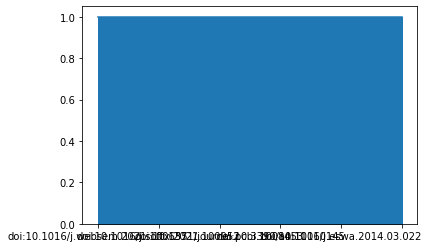

In [ ]:
id_count.plot (kind = "area")


#i can't put event count in plot because it has index 0

Key on x axis, frequency on y axis. The area plot above shows that it is impossible to plot the id, being all different values, same thing as for titles. Event can't be plotted as well having an index of 0 (empty key).

<AxesSubplot:>

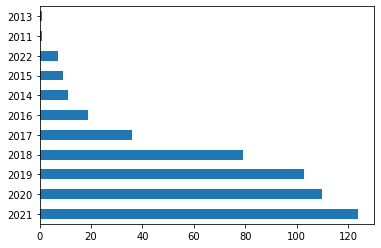

In [ ]:
year_count.plot(kind ="barh")


Keys on y axis, frequency on x axis. The most frequent publication year is 2021, then 2020, 2019, 2018, 2017, 2016, 2014, 2015, 2022, while 2011 and 2013 both have only 1 publication.

<AxesSubplot:>

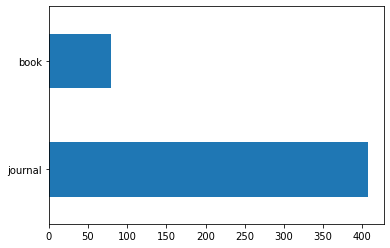

In [ ]:
venue_count.plot (kind = "barh")

Key on y axis, values on x axis. The majority of venue types is journal, less than 80 publications have venue book.

<AxesSubplot:>

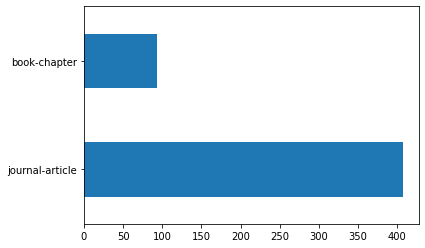

In [ ]:
type_count.plot (kind = "barh")

Keys on y axis, frequency on x axis. The majority of publications have type journal-article, while less than 100 publications have type book-chapter.

<AxesSubplot:>

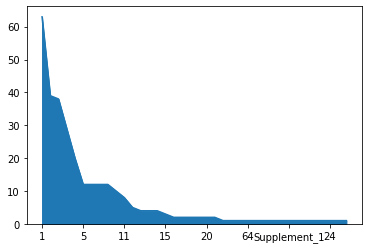

In [ ]:
issue_count.plot(kind = "area")


The area plot above has keys on the x axis and frequency on the y axis. The most frequent issue is 1 which has more than 60 occurrancies.

<AxesSubplot:>

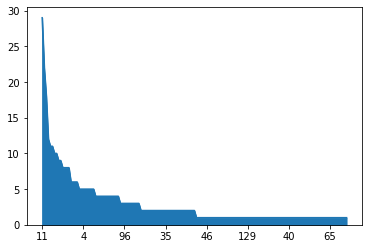

In [ ]:
volume_count.plot (kind = "area")


The keys are on x axis, while the frequency is on the y axis. The most frequent volume is 11 having almost 30 publications, volume 4 has 5 publications.

<AxesSubplot:>

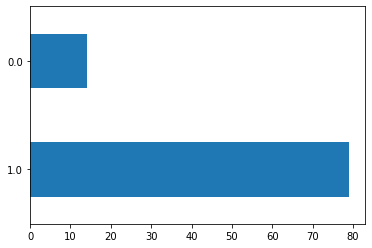

In [ ]:
chapter_counts.plot (kind = "barh")

Keys on the y axis and frequency on the x axis. The majority of publications have no chapter assigned, the rest has 80 values 1 and 15 values 0.

<AxesSubplot:>

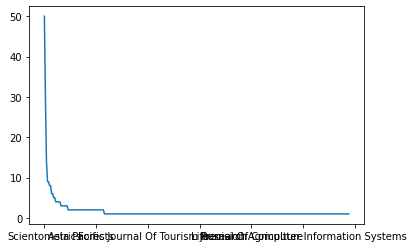

In [ ]:
pub_venue_count.plot()

Values on the x axis and frequency on the y axis. The majority of publications have venue Scientometrics as visualized also before through the count function.

<AxesSubplot:>

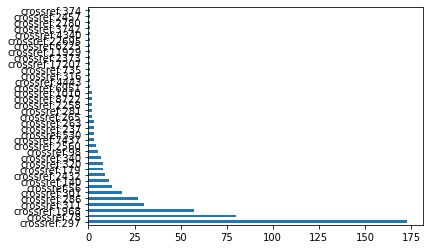

In [ ]:
publisher_count.plot (kind = "barh")


On the y axis there is the publisher values, on the x axis the frequency. The majority of publications has publisher crossref:297.

<AxesSubplot:>

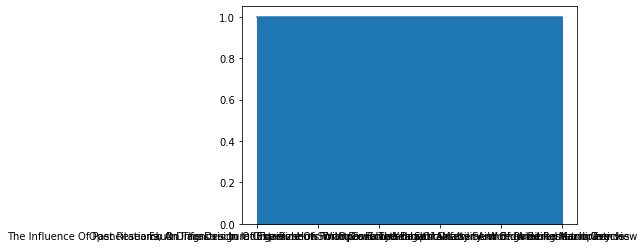

In [ ]:
title_count.plot(kind = "area") 

Title count plot is not meaningful because the titles are all different, that's why the plot area highlightens everything.

In [ ]:
id_count_sorted = id_count.sort_index()
print(id_count_sorted)

title_count_sorted = title_count.sort_index()
print(title_count_sorted)

type_count_sorted = type_count.sort_index()
print(type_count_sorted)

year_count_sorted = year_count.sort_index()
print(year_count_sorted)

issue_count_sorted = issue_count.sort_index()
print(issue_count_sorted)

volume_count_sorted = volume_count.sort_index()
print(volume_count_sorted)

chapter_counts_sorted = chapter_counts.sort_index()
print(chapter_counts_sorted)

pub_venue_count_sorted = pub_venue_count.sort_index()
print(pub_venue_count_sorted)

venue_count_sorted = venue_count.sort_index()
print(venue_count_sorted)

publisher_count_sorted = publisher_count.sort_index()
print(publisher_count_sorted)

event_count_sorted = event_count.sort_index()
print(event_count_sorted)

doi:10.1002/adom.202100519             1
doi:10.1002/agj2.20628                 1
doi:10.1002/asi.23267                  1
doi:10.1002/asi.23630                  1
doi:10.1002/asi.23770                  1
                                      ..
doi:10.4018/978-1-7998-7452-2.ch016    1
doi:10.4218/etrij.2018-0059            1
doi:10.7250/bjrbe.2020-15.470          1
doi:10.7717/peerj-cs.421               1
doi:10.7717/peerj.2567                 1
Name: id, Length: 500, dtype: int64
20 Years Of Electronic Commerce Research                                                                                                            1
A Bibliometric Analysis Of Academic Misconduct Research In Higher Education: Current Status And Future Research Opportunities                       1
A Bibliometric Analysis Of Comparative Research On The Evolution Of International And Chinese Green Supply Chain Research Hotspots And Frontiers    1
A Bibliometric Analysis Of Covid‐19 Publications In The Ten Psy

Now sorting alphabetically (strings) and ascendently (numbers) in order to visualize data more ordinately.

<AxesSubplot:>

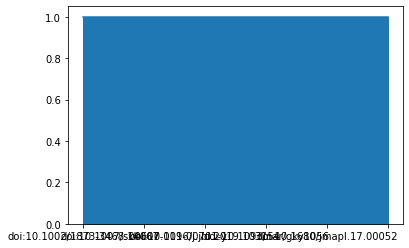

In [ ]:
id_count_sorted.plot(kind = "area")

#tell the differences between sorted plot and regular plot

Sorting ids did not change the fact that they are all different and that it is not possible to visualize them properly in a graph.

<AxesSubplot:>

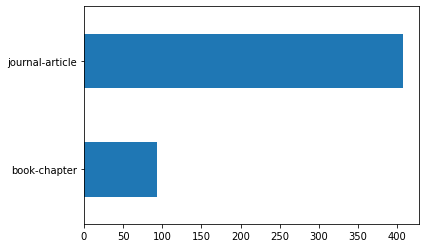

In [ ]:
type_count_sorted.plot(kind = "barh")



Sorting did not change the type frequency.

<AxesSubplot:>

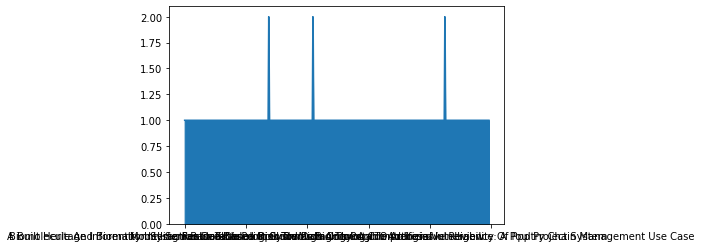

In [ ]:
 title_count_sorted.plot(kind = "area")


On the x axis there are the values, on the y axis the frequency. Conting titles is pointless though because they are all different.

<AxesSubplot:>

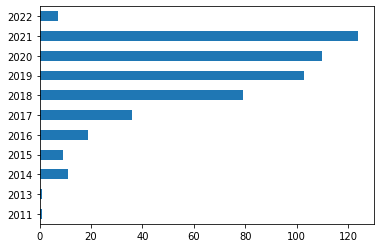

In [ ]:
year_count_sorted.plot(kind = "barh")

On the y axis there are year values, on the x axis their frequency. They are ordered ascendently.

<AxesSubplot:>

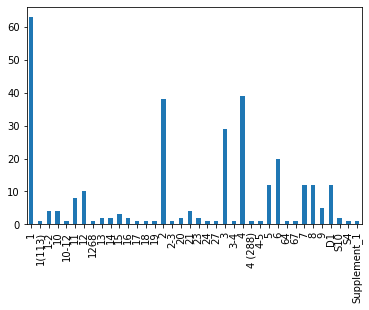

In [ ]:
issue_count_sorted.plot(kind = "bar")

On the x axis there are issue values, on the y axis their frequency. The most frequent (60) issue is 1.

<AxesSubplot:>

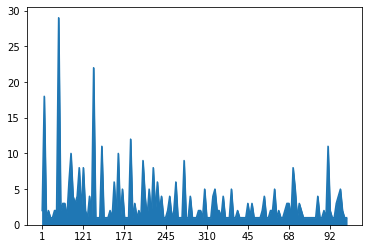

In [ ]:
volume_count_sorted.plot(kind = "area")

On the x axis there are the volume values, while on the y axis their frequency. The data visualization appears wrong because they should be ordered for frequency or ascendently but they are displayed randomly.

<AxesSubplot:>

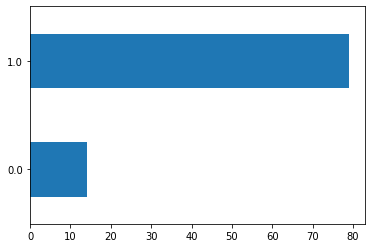

In [ ]:
chapter_counts_sorted.plot(kind = "barh")

On the x axis there is the frequency, while on the y axis there are the chapter numbers. Most chapters have no value assigned, 80 have value 1, and 15 have value 0.

<AxesSubplot:>

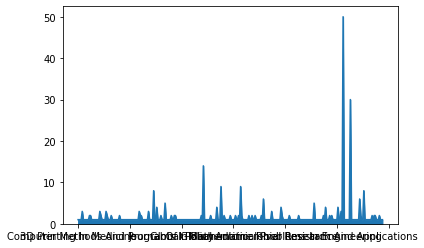

In [ ]:
pub_venue_count_sorted.plot(kind = "area")

On the x axis there is the publication venue, on the y axis its frequency. The data is overlapping so it is difficult to find significant results, but the majority of publication venues are unique.

<AxesSubplot:>

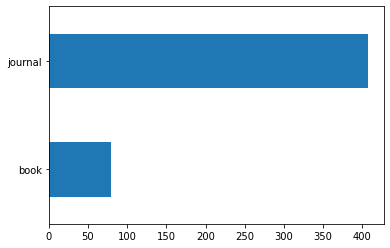

In [ ]:
venue_count_sorted.plot(kind = "barh")

On the x axis there is the frequency, on the y axis there is the venue: almost all publications have venue journal, some publications have venue book.

<AxesSubplot:>

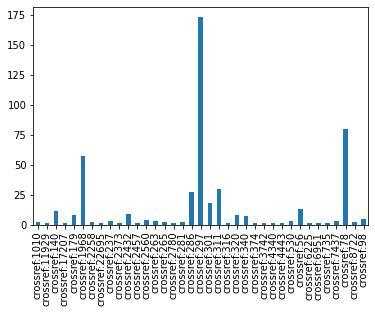

In [ ]:
publisher_count_sorted.plot(kind = "bar")

On the x axis there are publisher values, on the y axis their frequency. The most frequent publisher is crossref:297 with almost 175 occurrancies.